In [245]:
# implementing libraires
import findspark
import glob
import matplotlib.pyplot as plt

findspark.init()

from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from wordcloud import WordCloud, STOPWORDS

In [246]:
spark = SparkSession.builder.master('local[*]').appName('WordCounter').getOrCreate().sparkContext

In [247]:
articles_read = sc.textFile(r'/Users/takhirovichim/Desktop/Univ/Module#3/Research/HW#2/Articles')

In [248]:
def lower_clean_str(x):
  punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'
  lowercased_str = x.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, ' ')
    lowercased_str = lowercased_str.replace(ch, '\n')
  return lowercased_str

In [249]:
articles_read = articles_read.map(lower_clean_str)

In [250]:
text_count = articles_read.flatMap(lambda x: x.split(' '))\
                .map(lambda x: (x, 1))\
                .reduceByKey(lambda x, y: x+y)

In [251]:
df_count = text_count.toDF()
df_count1 = df_count.toPandas()

In [252]:
df_count1 = df_count1.rename(columns={'_1':'word', '_2':'count'})
df_count1 = df_count1[~df_count1['word'].isin(['the', 'a', 'to', 'be', 'or', 'and',  'in',  'it',  'by', 'are', 'as',
                'by', 'of', 'up', 'get', 'is', 'you', 'for', 'with', 'that', 'an', 'we', 'this', 'will', 'can'])]
df_final_counts = df_count1.sort_values('count', ascending = False).head(10)
df_final_counts

# problem with removing space 

,word,count
6,,921
1157,neural,69
1536,network,61
743,value,54
1137,task,51
1696,our,46
27,have,43
20,output,41
198,which,40
197,how,37


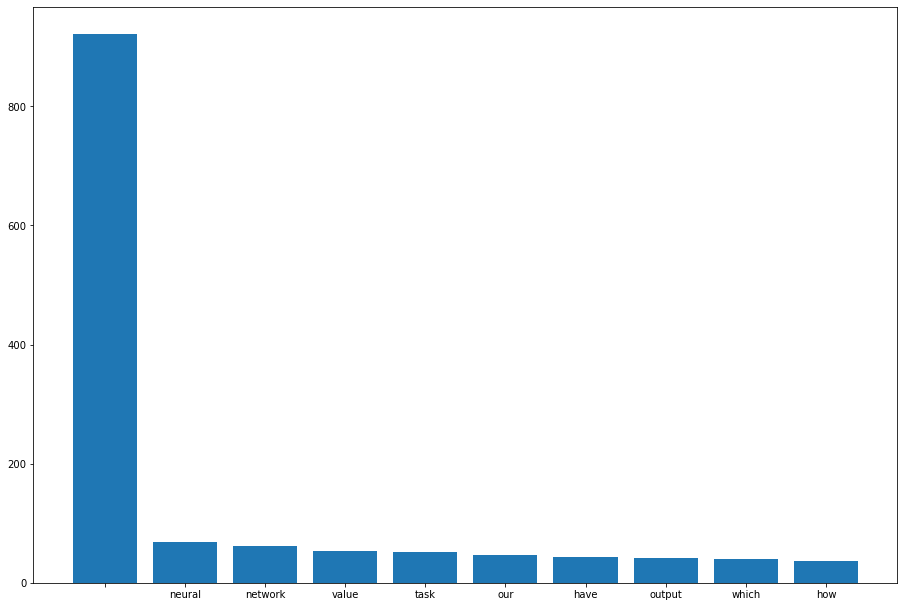

In [253]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(df_final_counts['word'],df_final_counts['count'])
plt.show()

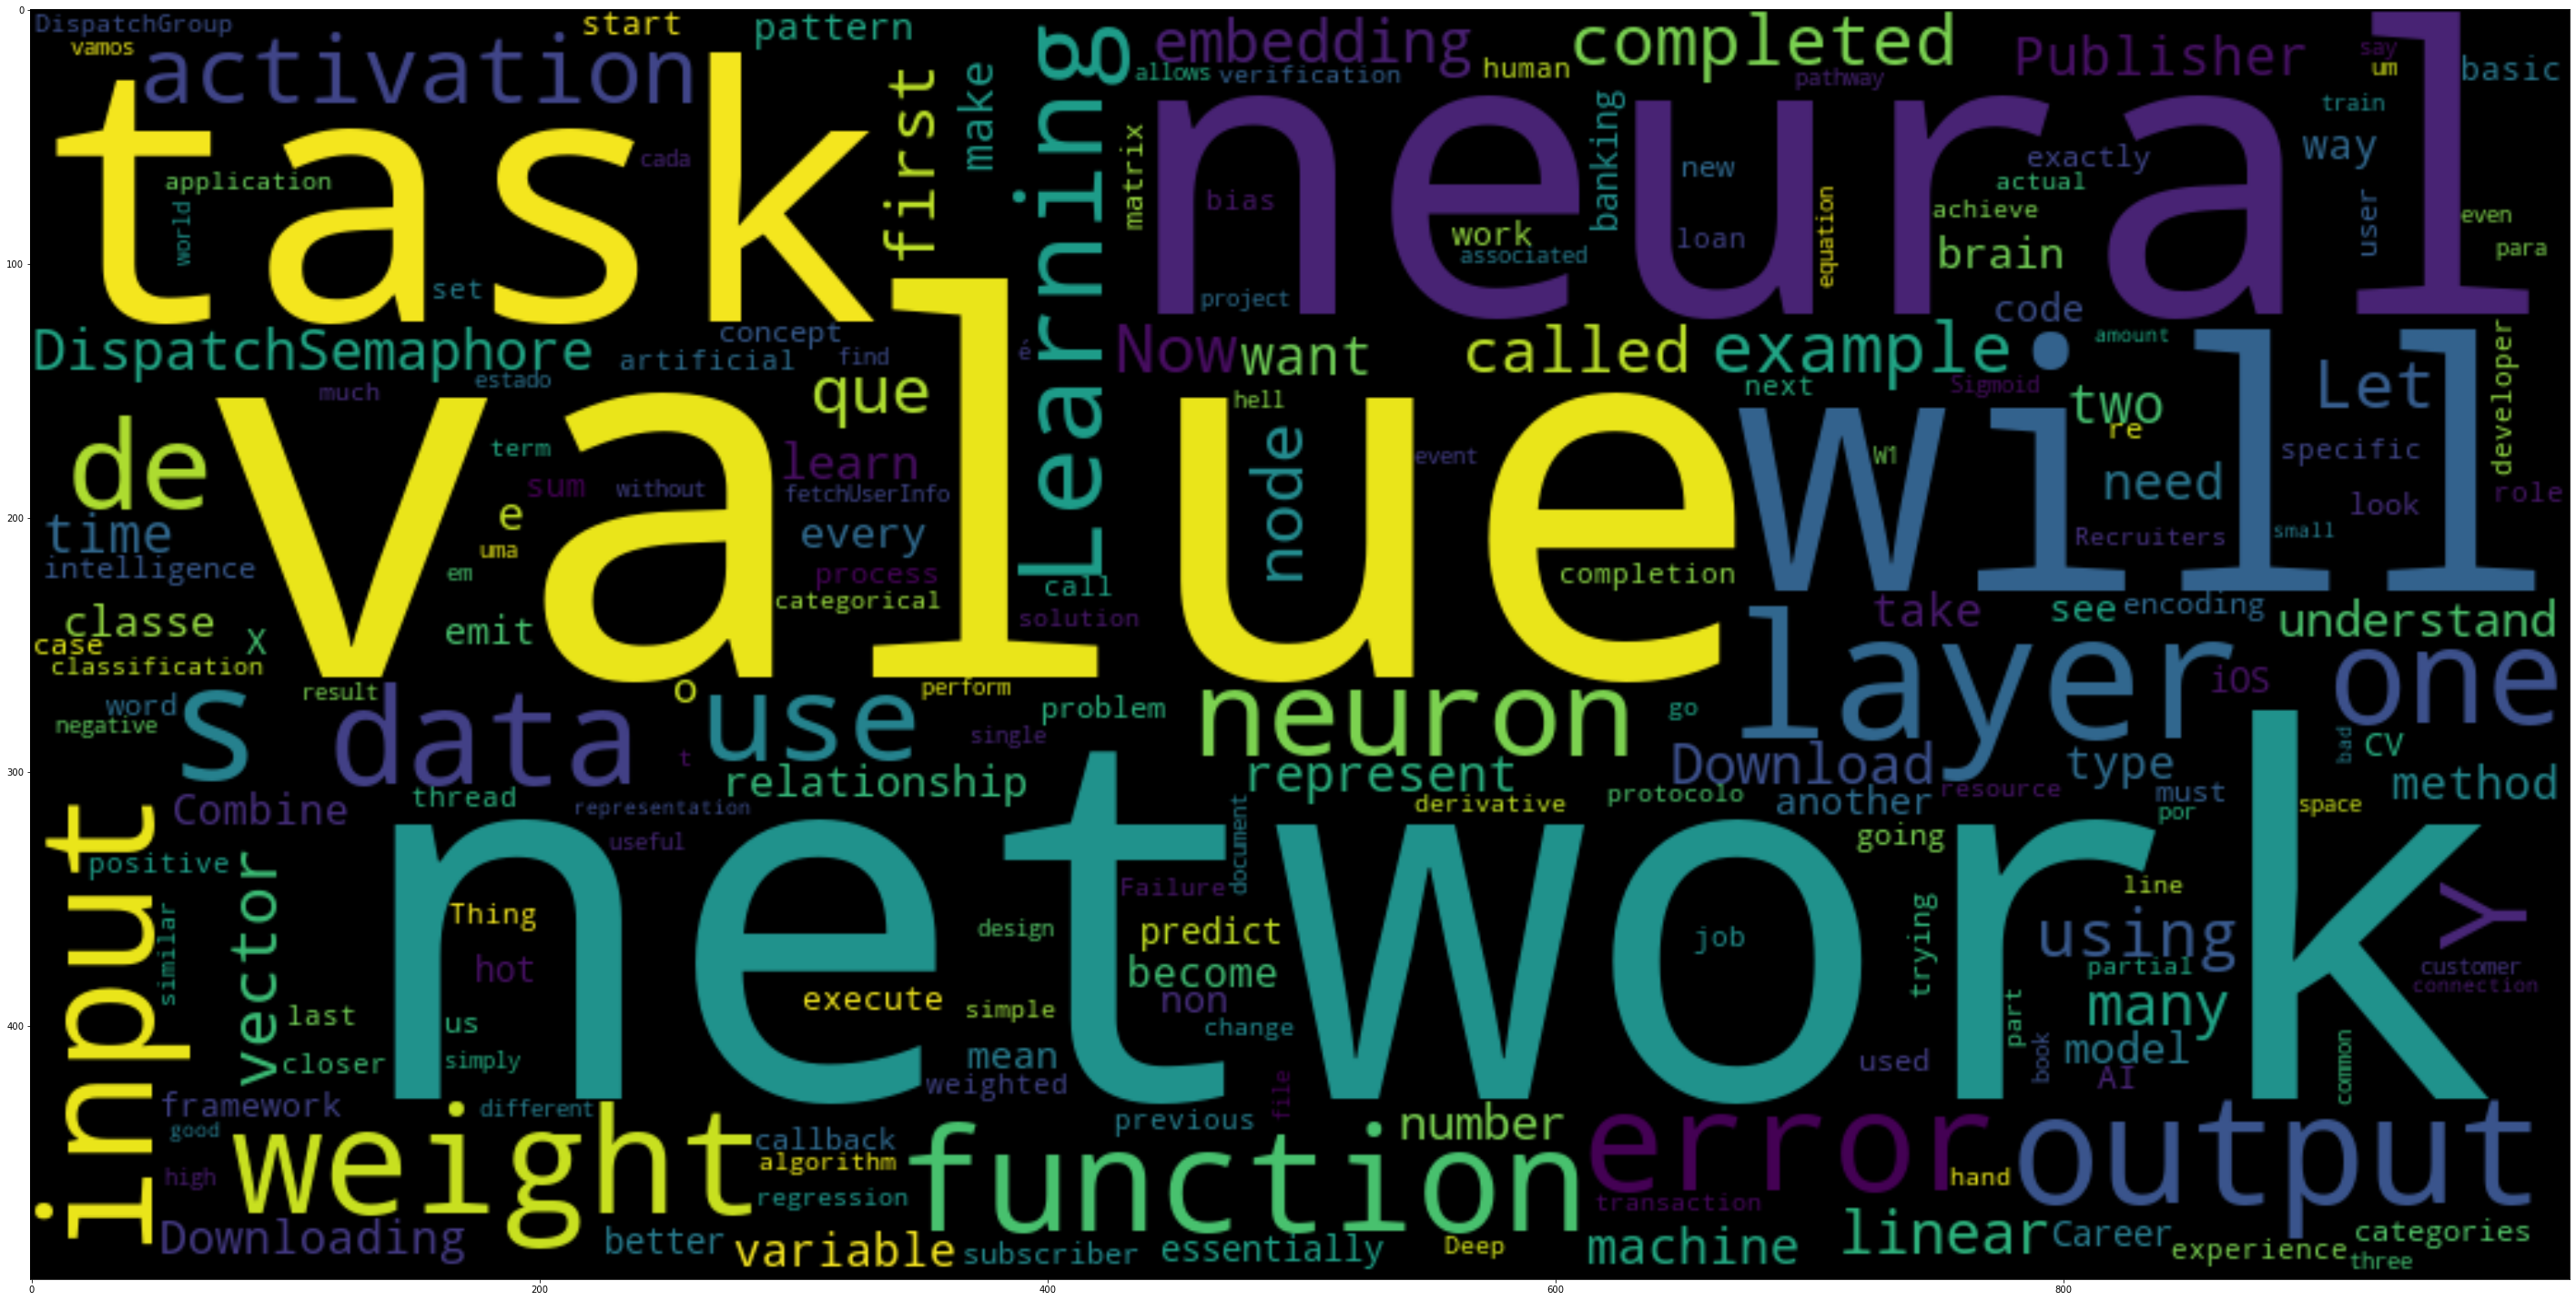

In [270]:
# World Cloud
file_read = open("/Users/takhirovichim/Desktop/Univ/Module#3/Research/HW#2/AllinOne.txt", encoding="utf8").read()
wordcloud = WordCloud(width = 1000, height = 500, random_state=0, collocations=False, stopwords = STOPWORDS).generate(file_read)
plt.figure(figsize=(50, 40))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [268]:
df1.count()

word     1862
count    1862
dtype: int64